In [ ]:
import robin_stocks
import robin_stocks.robinhood as r
import pandas as pd
from configs import *
login = r.login(username, pwd)

In [ ]:
final_table_columns = ['chain_symbol','expiration_date', 'rhs_tradability', 
                        'state', 'strike_price', 'tradability', 'type', 
                        'ask_price', 'bid_price', 'break_even_price',
                        'open_interest', 'volume' ,'symbol', 'chance_of_profit_long',
                        'chance_of_profit_short', 'delta', 'gamma', 'implied_volatility',
                        'rho', 'theta', 'vega']

In [ ]:
optionData = r.find_options_by_expiration(
        'tsla', 
        expirationDate='2021-05-21',
        optionType='call'
    )
latest_price = r.stocks.get_latest_price('TSLA', priceType=None, includeExtendedHours=True)

df = pd.DataFrame(optionData)
df = df.drop(columns=[col for col in df if col not in final_table_columns])
df["strike_price"] = df.strike_price.astype(float)

In [ ]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
df = df.sort_values(by=['strike_price'], ascending=False)
latest_price
df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

price = np.arange(700,920,1)

k_call_higher = 850 # the strike price of OTM call(Higher k)
k_call_lower = 820 # the strike price of OTM call(Lower k)
k_put_higher = 780 # the strike price of OTM put(Higher k)
k_put_lower = 750 # the strike price of OTM put(Lower k)
premium_call_higher = 2 # the premium of OTM call(Higher k)
premium_call_lower = 10 # the premium of OTM call(Lower k)
premium_put_higher = 10 # the premium of oTM put(Higher k)
premium_put_lower = 2   # the premium of OTM put(Lower k)

# payoff for the long put position
payoff_long_put = [max(-premium_put_lower, k_put_lower-i-premium_put_lower) for i in price]
# payoff for the short put position
payoff_short_put = [min(premium_put_higher, -(k_put_higher-i-premium_put_higher)) for i in price]
# payoff for the short call position
payoff_short_call = [min(premium_call_lower, -(i-k_call_lower-premium_call_lower)) for i in price]
# payoff for the long call position
payoff_long_call = [max(-premium_call_higher, i-k_call_higher-premium_call_higher) for i in price]
# payoff for Long Iron Condor Strategy
payoff = np.sum([payoff_long_put,payoff_short_put,payoff_short_call,payoff_long_call], axis=0)

plt.figure(figsize=(20,15))
plt.plot(price, payoff_long_put, label = 'Long Put',linestyle='--')
plt.plot(price, payoff_short_put, label = 'Short Put',linestyle='--')
plt.plot(price, payoff_short_call, label = 'Short Call',linestyle='--')
plt.plot(price, payoff_long_call, label = 'Long Call',linestyle='--')
plt.plot(price, payoff, label = 'Long Iron Condor',c='black')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Long Iron Condor Strategy Payoff',fontsize = 20)
plt.grid(True)

[-2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -1
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  1  0 -1 -2 -3 -4 -5 -6 -7 -8 -8
 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8
 -8 -8 -8 -8]
[-34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17
 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1
   2   3   4   5   6   6   6   6   6   6   6   6   6   6   6   6   6   6
   6   6   6   6   6   6   6   5   4   3   2   1   0  -1  -2  -3  -4  -4
  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4
  -4  -4  -4  -4  -4  -

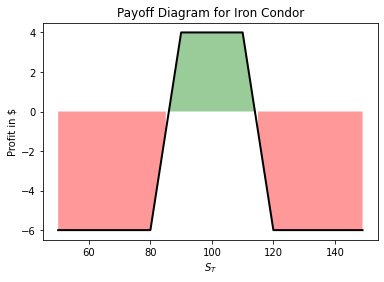

Max Profit: $4
Max loss: $-6
Option(type=call,K=120, price=2,side=long)
Option(type=call,K=110, price=4,side=short)
Option(type=put,K=90, price=4,side=short)
Option(type=put,K=80, price=2,side=long)
Cost of entering position $0


In [60]:
from options_strategies import OptionStrat

obj = OptionStrat('Iron Condor', 200, {'start': 50, 'stop':150,'by':1})
obj.long_call(120, 2, 1)        
obj.short_call(110, 4, 1)
obj.short_put(90, 4, 1)  
obj.long_put(80, 2, 1)           
obj.plot(color='black', linewidth=2)  
obj.describe()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,